<div dir="rtl">
    <h2>
        تمرین اول
        (۱۰۰ + ۱۰ امتیاز)
    </h2>
</div>
<p></p>
<div dir="rtl">
بذارید یه حدسی بزنم، خیلی از شما علاقه دارید که دانشمند داده بشید. شاید حدسم غلط باشه ولی خب ما دوست داریم شغل آیندمون در ارتباط با این موضوع باشه و برای همین با خودمون گفتیم که از شما کمک بگیریم. 
مساله‌ی اول برای انجام کار مورد علاقه، پیدا کردن اون کاره! برای اینکه با چشم باز بریم سراغ کاری که دوست داریم، سعی کردیم از یه سایت کاریابی یه سری اطلاعات استخراج کنیم؛ اما خب همه می‌دونیم داده خام خیلی بدرد نمی‌خوره و برای همین به کمک شما نیاز داریم.
</div>

<div dir="rtl">
توجه کنید که توی این تمرین قراره کد بزنید و به هزار روش میشه یک کد روز زد! از این هزار روش معمولا ۹۹۵ تاش روش‌های خوبی نیستن. یا کد اسپاگتی هستن یا از توانایی‌های زبون و فریم ورک استفاده نشده یا نتیجه خیلی مطلوبی به نمایش نمیذارن و ... ما برای اینکه از رفتن به اون ۹۹۵ راه تقریبا اشتباه جلوگیری کنیم یه سری خواسته داریم:
    <ul>
    <li/>
        به هیچ عنوان از حلقه‌ها استفاده نکنید.
    <li/>
            از توانایی‌های کتابخونه pandas استفاده کنید.
    <li/>
    بطور کلی کد پایتون خالی نزنید. تقریبا همه کارهایی که کتابخونه‌های پایتون می‌کنند رو خود شمام می‌تونید بکنید ولی چرخ رو از اول اختراع نکنید. اگر امکان انجام کاری با pandas وجود داره اون کار رو بصورت دیگه انجام ندید.
    <li/>
        نمودارها در جایی که انتخاب نوع نمودار با شماست باید بطور واضح، منظوری رو بیان کنن. یعنی بطور شانسی داده‌ها رو داخل یک نمودار رندم قرار ندید بلکه کمی برای انتخاب نمودارهاتون سلیقه و دقت به خرج بدید.
    </ul>
</div>

<div dir="rtl">
در مرحله اوّل لازمه بتونید اطلاعات رو لود کنید. اطلاعات توی فایل
usjobs.csv همراه این تمرین براتون گذاشته شده.
این اطلاعات رو لود کنید و ۵ سطر اول اون رو به ما نشون بدید که بتونیم یه ایده‌ای راجع به این فایل داشته باشیم.
(۳ امتیاز)    
</div>

In [1]:
import pandas as pd
import numpy as np

In [2]:
jobs = pd.read_csv("usjobs.csv")
print(jobs.head())
print(jobs.shape)


   Unnamed: 0  ... Easy Apply
0           0  ...       True
1           1  ...        NaN
2           2  ...        NaN
3           3  ...        NaN
4           4  ...       True

[5 rows x 16 columns]
(2253, 16)


<div dir="rtl">
یه اتفاق بدی که معمولا برای دیتاست‌ها میوفته اینه که یک‌سری از داده‌ها تهی هستن و این کار معمولا تحلیل داده رو برای 
  ما سخت می‌کنه.  پس بیاید قبل از هرکاری ببینیم چقدر این داده‌ها تهی هستن.  برای این کار تعداد و درصد داده‌های تهی هر ستون رو بگید. 
(۴ امتیاز)
</div>

In [3]:
nan_total_per_col = jobs.isnull().sum(axis=0).tolist()
nan_total_percent = list(map(lambda x: x * 100 / len(jobs), nan_total_per_col))

print(nan_total_per_col)
print(nan_total_percent)

[0, 0, 1, 0, 0, 1, 0, 172, 163, 660, 163, 353, 353, 163, 1732, 2173]
[0.0, 0.0, 0.04438526409232135, 0.0, 0.0, 0.04438526409232135, 0.0, 7.634265423879272, 7.23479804704838, 29.29427430093209, 7.23479804704838, 15.667998224589436, 15.667998224589436, 7.23479804704838, 76.87527740790058, 96.4491788726143]


<div dir="rtl">
    همون‌طور که می‌بینید در بعضی از ستون‌ها بیش از ۵۰ درصد داده تهی هستن. ستون‌هایی که این ویژگی رو دارن از مجموعه داده‌ها حذف کنید.
    (۴ امتیاز)
</div>

In [4]:
jobs = jobs.dropna(thresh=len(jobs) * 50/100, axis=1)
print(jobs.shape)

(2253, 14)


<div dir="rtl">
در بعضی از ستون‌ها فقط یک داده‌ی تهی وجود داره. سطرهای مربوط به این داده‌های خالی رو از مجموعه‌ی داده‌ها حذف کنید و ابعاد مجموعه داده‌های جدید را نمایش بدید.
    (۴ امتیاز)
</div>

In [5]:
nan_total_per_col = jobs.isnull().sum(axis=0).tolist()
na_indices = [i for i, x in enumerate(nan_total_per_col) if x == 1]
print(na_indices)
na_colnames = list(map(lambda i: jobs.columns[i], na_indices))
jobs = jobs.dropna(subset=na_colnames)
print(jobs.shape)

[2, 5]
(2251, 14)


<div dir="rtl">
    در سلول زیر روش‌های متداول برای حل مشکل 
    Data Missing
    رو به طور کامل شرح بدید و برای هر روش بیان شده کاربردهاش رو توی این مجموعه داده بررسی کنید.
    (۴ روش کافیه)
    (۱۲ امتیاز)
</div>

<div dir="rtl">
<font face="B Zar">
۴ راه داریم:

<p>fillna() :‌این تابعی است که با آن می‌توان به جای NaN در یک سلول، مقادیری مثل مقدار سطر قبلی در همان ستون (fillna(method ='ffill')) یا مقدار سطر بعدی (fillna(method ='bfill') ) را گذاشت. این وقتی خوب است که داده‌ها بر حسب مقدار آن ستون sort شده باشند یا از توزیع یکنواخت پیروی کنند،‌که اینجا به نظر نمی‌رسد مناسب باشد. </p>
<p>replace() : این متدی است که با آن می‌توان یک مقدار ثابت را در ستون‌های NaN جایگزین کرد. مثلا ۰ (که خوب نیست چون برداشت‌هایی را که از داده‌ها داریم را نادرست می‌کند). می‌توان از مقادیری مثل میانگین یا میانه‌ی مقادیر آن ستون برای جایگزینی NaN استفاده کرد که خصوصا با فرض نرمال بودن توزیع مقادیر ستون خوب است. (البته این کار را با aggregate گرفتن در  dropna() هم می‌شد انجام داد) به نظر می‌رسد برای داده‌های ما مناسب باشد چون تعداد داده‌ها زیاد است و توزیع آنها به نرمال میل می‌کند.</p>
<p>
interpolate() : همان طور که از اسمش پیداست یک چندجمله‌ای (در این جا خط) از مقادیر قبلی یا بعدی ستون  در سطری که آن ستون در آن NaN است رد می‌کند و براساس آن خط، مقدار ستون را در آن سطر پیدا می‌کند. از آن جایی که فاصله‌ی میان سطور را یکسان در نظر می‌گیرد،‌ به نظر می‌رسد که بیشتر برای داده‌های time series مناسب باشد، و نه برای داده‌های فعلی ما که هر سطر تقریبا همان قدر به سطر بعدی‌اش ربط دارد که به ۱۰۰ سطر بعد ربط دارد. البته اگر داده‌های مشابه کنار هم باشند شاید خوب باشد ،مثلا در cities،‌ اگر شهرهای هر ایالت پشت سر هم باشند شاید بتوان مقدار lat یا lngای که NaN است را با این روش خوب تقریب زد.
</p>
<p>
dropna(): که مقادیر NaN را حذف می‌کند. می‌توان به آن تنظیمات مختلفی داد. مثلا می‌توان به آن گفت که سطرهایی که یکی از چند ستون خاص  یا همه‌ی آنها در آن‌ NaN است را حذف کند. این برای کار ما مناسب است چون که ما فقط با بعضی از ستون‌های داده‌ها کار داریم و بنابراین مجبور نیستیم سطری که در ستون‌هایی که لازم نداریم مقدار NaN دارد را خذف کنید و از داده‌ی مفید آن در ستون‌هایی که نیاز داریم محروم شویم. می‌توان آن را تنظیم کرد تا ستو‌ن‌هایی را حذف کند (که این در صورتی مناسب است که درصد زیادی از سطرهای یک ستون NaN باشد به طوری که با مقادیر باقیمانده نتوان آن ستون یا رابطه‌اش با ستون‌های دیگر را آنالیز کرد) که این را در همان سوالات اول انجام دادیم،‌ اگر هم تعداد سطرهای NaNدر یک ستون به نسبت تعداد کل داده‌ها کم باشد و بتوان با سطرهای باقیمانده تحلیل را انجام داد (مثل دو تا از ستون‌هایمان که فقط ۱ سطر NaN دارند درحالیکه تعداد داده‌ها بیش از ۲۰۰۰ تاست) باز این روش مفید است.
</p>
منبع: 
<br>https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
<br>
https://towardsdatascience.com/handling-missing-values-with-pandas-b876bf6f008f
</font>
</div>

<div dir="rtl">
    ...
(پاسخ تشریحی)
</div>

<div dir="rtl">
تا اینجای کار فقط داشتیم داده‌هامون رو تمیز می‌کردیم. از اینجا به بعد می‌خوایم کمی روی اونها کار کنیم. یکی از 
فاکتورهای مهم توی کار کردن میزان حقوقه. پس بیاید و ستون تخمین حقوق رو به دو ستون تبدیل کنید که حداقل و حداکثر حقوق 
درخواستی در اون درج شده.
سپس ستون میانگین حقوق را از این دو ستون جدید به دست بیارید و در انتها پنج داده‌ی اول مجموعه داده رو نمایش بدید.
    (۸ امتیاز)
</div>

In [6]:
# jobs['Salary Estimate']

def find_min(dollar_exp):
    min_start = dollar_exp.find("$")
    min_end = dollar_exp.find("K")
    minn = dollar_exp[min_start + 1: min_end]
    return int(minn)

def find_max(dollar_exp):
    min_end = dollar_exp.find("K")
    d2 = dollar_exp[min_end + 1: ]
    max_start = d2.find("$")
    max_end = d2.find("K")
    maxx = d2[max_start + 1: max_end]
    return int(maxx)



# print(clear_string("$37K-$66K (Glassdoor est.)"))
jobs['min_salary'] = jobs['Salary Estimate'].apply(find_min)
jobs['max_salary'] = jobs['Salary Estimate'].apply(find_max)

jobs['avg_salary'] = (jobs['min_salary'] + jobs['max_salary']) / 2
print(jobs.shape)

(2251, 17)


<div dir="rtl">
    می‌خوایم یه آمار کلی از حقوق کارها داشته باشیم. کاری که می‌خوایم بکنید اینه که ۵٪ از کارها با بالاترین میانگین حقوق و ۵٪ از کارها با پایین‌ترین میانگین حقوق رو حذف کنید و بعدش یه آمار کلی از میانگین حقوق‌ها بدید و همچنین بگید که بنظرتون چرا ۵٪ از بالا و ۵٪ از پایین رو حذف کردیم؟ آمار کلی‌ای که می‌خوایم شامل:  mean, std, min, max می‌شه.
    (۶ امتیاز)
</div>

<div dir="rtl">
    ...
(پاسخ تشریحی)
</div>

<div dir="rtl">
داده‌های ۵٪ بالاتر و ۵٪ پایین‌تر را حذف می‌کنیم چون این‌ها احتمالا استثناء (outlier) هستند و اطلاعات خوبی در مورد کلیت مشاغل به ما نمی‌دهند. مثلا اگر یک شغل ماهی ۱۰ میلیون دلاری داشته باشیم،‌ این داده به تنهایی می‌تواند میانگین حقوق‌ها را چندهزار دلار زیاد کند و بنابراین برداشت ما از میانگین حقوق‌ها (خصوصا اگر میانگین حقوق را در هر شرکت جدا حساب کنیم برای آن شرکت خاص که این شغل را دارد) اشتباه خواهد شد.
بعد ممکن است آن شرکت‌ها شرکت‌های کوچکی باشد، و برداشت کنیم که شرکت‌های کوچکتر حقوق‌های بالاتری می‌دهند و... همینطور به استنتاجات اشتباه ادامه می‌دهیم.
</div>

In [7]:
# print(jobs[jobs["Job Title"] == "(Data Risk Analyst: Data Modeler)"])
jobs = jobs[(jobs['avg_salary'] > np.percentile(jobs['avg_salary'], 5)) & (jobs['avg_salary'] < np.percentile(jobs['avg_salary'], 95))]

titles = jobs.groupby('Job Title')['avg_salary'].agg([np.min, np.max, np.mean, np.std])
pd.set_option('display.max_columns', 7)
print(titles.head(30))

# in_liers = titles[(titles['mean'] > np.percentile( titles['mean'], 5)) & (titles['mean'] < np.percentile( titles['mean'], 95))]
# print(titles.shape, in_liers.shape)


                                                    amin   amax   mean  \
Job Title                                                                
#104252 Division Data and Financial Analyst         47.5   47.5  47.50   
#105009 Research Data Analyst                       92.0   92.0  92.00   
(Data Analyst) BA/BSA                               61.5   61.5  61.50   
(Data Risk Analyst: Data Modeler)                   51.0   51.0  51.00   
(REMOTE) Sr. Risk Analyst (IT, IS and/or Data e...  81.0   81.0  81.00   
(Risk Data Analyst)                                 51.0   51.0  51.00   
+ Global Process Data Analyst                       63.5   63.5  63.50   
.Net Developer - Program Data Design Analyst        98.5   98.5  98.50   
.net, sharepoint, Java, Data analyst, Business ...  39.5   39.5  39.50   
19-84R Team Lead (Data Analyst IV)                  60.0   60.0  60.00   
2021 Summer Analyst Program- Data & Analytics S...  39.5  100.0  69.75   
57072 - Market data Analyst - 100 % re

<div dir="rtl">
در ادامه میانگین حقوق پیشنهادی شرکت‌ها رو به دست بیارید (دقت کنید برای هر شرکت باید میانگین رو روی کار‌های مختلف اون شرکت حساب کنید و در نهایت به یک عدد برسید) و بعدش نمودار توزیع تخمینی رو رسم کنید.
    (۷ امتیاز)
    </div>

(1360, 1)
                               avg_salary wage_category
Company Name                                           
1                                    41.5         46.85
1199SEIU Funds\n3.2                  63.5         68.90
1872 Consulting\n5.0                 59.0         61.55
2000 east westmoreland st llc        59.5         61.55
212 Factors                          75.5         76.25
70.13595352553516


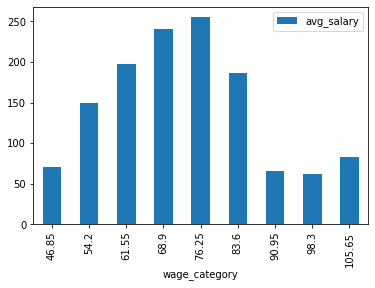

In [8]:
# print(jobs.columns)
# print(jobs.head())
# print(jobs[["Salary Estimate", "min_salary", "max_salary"]].iloc[100:200,])
mean_salaries = jobs[['Company Name', 'avg_salary']].groupby(['Company Name']).mean()
# mean_salaries['Company Name'] = mean_salaries.index
# print(mean_salaries.shape)
# print(mean_salaries.head(10))
# print(mean_salaries.dtypes)


mean_salaries = mean_salaries.dropna(subset=['avg_salary'])
# mean_salaries['avg_salary'].value_counts().plot.hist()
l = np.max(mean_salaries['avg_salary']) - np.min(mean_salaries['avg_salary'])
s = np.min(mean_salaries['avg_salary'])
print(mean_salaries.shape)
mean_salaries['wage_category'] = pd.cut(mean_salaries['avg_salary'], [s + i * l/10 for i in range(10)], labels=[s + i * l/10 for i in range(1, 10)])
print(mean_salaries.head())
mean_salaries.groupby('wage_category').count().plot(kind='bar')
# counts = mean_salaries.groupby(['avg_salary']).agg(len)
# counts = pd.DataFrame(counts, columns=['count'])
# print(counts.head())
print(np.mean(mean_salaries['avg_salary']))


<div dir="rtl">
حالا یه دسته‌بندی از رتبه بندی
    (Rating)
    شرکت‌ها و میانگین حقوق اون‌ها بدید.
    در ابتدا به جدولی که در قسمت قبل برای شرکت‌ها به دست آوردید،
    ستون Rating را اضافه کنید.
    حال
    توجه کنید که توی این دسته‌بندی ما حدود 
    Rating
    رو 
    می‌خوایم در نظر بگیریم. پس برای این کار هر ۰.۵ امتیاز رو توی یک دسته قرار میدیم. یعنی شرکت‌ها با امتیاز ۰ تا ۰.۴۹ توی یه دسته و شرکت‌ها با امتیاز ۰.۵ تا ۱ توی یه دسته و ... تا شرکتها با امتیاز ۴.۵ تا ۵ توی یه دسته قرار می‌گیرن. بعد از این دسته‌بندی میانگین حقوق هر دسته رو بدست بیارید و همه این دسته‌ها رو توی یه نمودار معنادار نمایش بدید.
   (۱۰ امتیاز)
 </div>

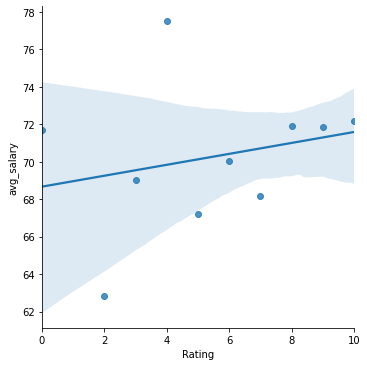

In [9]:
salaries = jobs[['Company Name', 'avg_salary']].groupby(['Company Name']).mean()
ratings = jobs[['Company Name', 'Rating']].groupby(['Company Name']).mean()


def dummy_rating(x):
    return int(x // 0.5)
# print(dummy_rating(1.63287))

ratings['Rating'] = ratings['Rating'].apply(dummy_rating)
salarating = pd.merge(salaries, ratings, on=['Company Name'])
# print(ratings.head())
# print(ratings.shape)
# print(salaries.head())
# print(salarating.shape)
# print(salarating[salarating['Rating'] > 8].head(30))
prestige_vs_generosity = salarating[['Rating', 'avg_salary']].groupby(['Rating']).mean()
prestige_vs_generosity["Rating"] = prestige_vs_generosity.index
# print(prestige_vs_generosity.index)
# prestige_vs_generosity.plot(x='Rating', y='avg_salary', style='o')
import seaborn as sns
sns.lmplot(x='Rating',y='avg_salary',data=prestige_vs_generosity,fit_reg=True) 

<div dir="rtl">
    به جدول شرکت‌ها ستون
    Revenue
    را اضافه کنید.
    سپس میانگین حقوق رو برای سطوح مختلف درآمدی شرکت‌ها در نمودار
    boxplot
    نمایش دهید.
.راستی حواستون به داده‌های تهی این ستون باشه و با توجه به مقادیر دیگر این ستون بهترین تصمیم رو بگیرید
    (۱۰ امتیاز)
</div>

1360


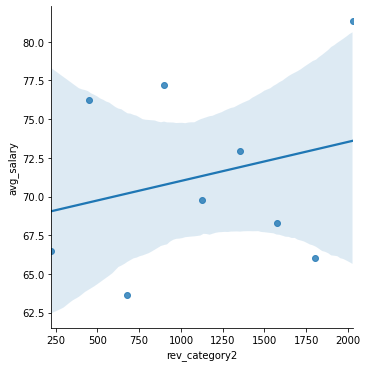

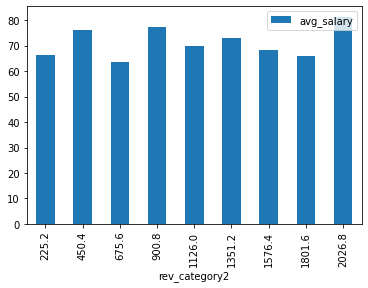

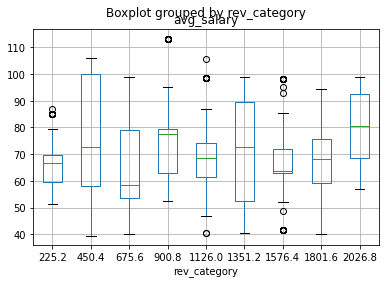

In [26]:
# revenues = jobs[['Company Name', 'Revenue']].groupby(['Company Name']).mean()
# jobs['Revenue'] = pd.to_numeric(jobs['Revenue'], errors = 'coerce')

# print(jobs['Revenue'].unique())

def revenue_to_numeric(rvnu):
    if rvnu == "Unknown / Non-Applicable" or rvnu == np.nan:
        return np.NaN
    if rvnu == "$10+ billion (USD)":
        return 15000
    if rvnu == "Less than $1 million (USD)":
        return 0.5
    if rvnu == "$500 million to $1 billion (USD)":
        return 750
    elif isinstance(rvnu, str):
        if 'billion' in rvnu:
            r = rvnu[: rvnu.find('billion')].split(" ")
            mn = r[0]
            mx = r[2]
            return (int(mn[1:]) + int(mx[1:])) * 1000 / 2

        elif 'million' in rvnu:
            r = rvnu[: rvnu.find('million')].split(" ")
            mn = r[0]
            mx = r[2]
            return (int(mn[1:]) + int(mx[1:])) / 2
        else:
            return np.NaN
    else:
        # print("OH")
        return np.NaN
    
# print(list(map(revenue_to_numeric, list(jobs['Revenue'].unique()))))
import numbers
jobs2 = jobs.copy()


jobs2['Revenue2'] = jobs2['Revenue'].apply(revenue_to_numeric)
jobs2['Revenue2'] = jobs2.groupby('Company Name').transform(lambda x: x.fillna(x.mean()))
jobs2['Revenue2'] = pd.to_numeric(jobs2['Revenue2'])
jobs2 = jobs2.apply(lambda x: x.fillna(x.mean()) if isinstance(x, numbers.Number) else x , axis=1)

# jobs['Revenue2'] = jobs.groupby(['Company Name'], sort=False)['Revenue2'].apply(lambda x: x.ffill().bfill())
# jobs['Revenue2'] = jobs['Revenue2'].fillna(jobs.groupby(['Company Name'])['Revenue2'].transform('mean'))
# revenues = jobs.combine_first(jobs.groupby('Company Name').transform('mean'))
revenues = jobs2[['Company Name', 'Revenue2', 'avg_salary']].groupby(['Company Name']).mean()
# print(revenues.dtypes)
# print(revenues.columns)
# print(revenues['Revenue2'].unique())
print(revenues['Revenue2'].isna().count())

# revenues = revenues[['Company Name', 'Revenue']]
# print(revenues.head())
l = np.max(revenues['Revenue2']) - np.min(revenues['Revenue2'])
s = np.min(revenues['Revenue2'])
revenues['rev_category'] = pd.cut(revenues['Revenue2'], [s + i * l/10 for i in range(10)], labels=[s + i * l/10 for i in range(1, 10)])
revenue_vs_wages = revenues[['rev_category', 'avg_salary']].groupby(['rev_category']).mean()
revenue_vs_wages['rev_category2'] = revenue_vs_wages.index
# print(revenue_vs_wages)

sns.lmplot(x='rev_category2',y='avg_salary',data=revenue_vs_wages,fit_reg=True)
revenue_vs_wages.plot('rev_category2', 'avg_salary', kind='bar') 
# revenue_vs_wages.groupby('rev_category2').count().plot(kind='bar')
revenues.boxplot(column='avg_salary',by='rev_category')

<div dir="rtl">
این مرحله از کارتون تکراریه و همون کاری که توی مرحله‌ی قبل کردید رو این بار با سایز شرکت‌ها بکنید، ببینیم
می‌شه به جمع بندی از حقوق شرکت‌ها رسید؟
باز هم توجه به داده‌های تهی مهمه که اشکالی در نمایش داده‌هاتون ایجاد نکنند و برای این مرحله هم از  boxplot استفاده کنید.  
    (۵ امتیاز)
</div>

1360


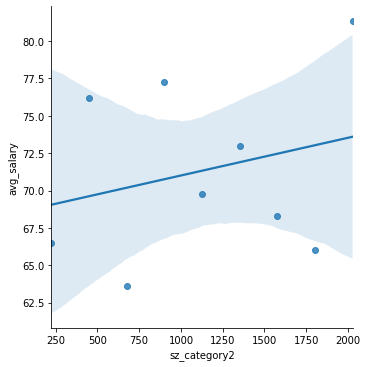

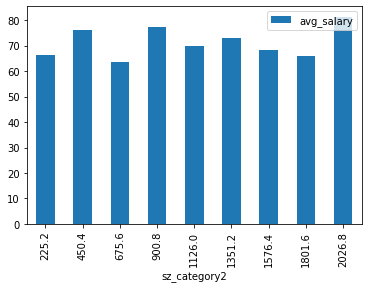

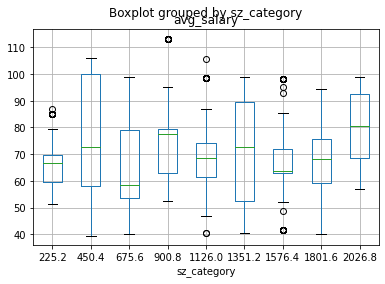

In [25]:
# print(jobs['Size'].unique())

def size_to_numeric(sz):
    if not isinstance(sz, str):
        return np.NaN
    else:
        if sz == "10000+ employees":
            return 15000
        elif sz == "Unknown":
            return np.NaN
        else:
            if not "employees" in sz:
                return np.NaN
            else:
                s = sz[: sz.find("employees")].split(" ")
                mn = int(s[0])
                mx = int(s[2])
                return (mn + mx) / 2

# print(list(map(size_to_numeric, jobs['Size'].unique())))

jobs2['Size2'] = jobs2['Size'].apply(size_to_numeric)
# jobs2['Size2'] = jobs2['Size2'].fillna(jobs2['Size2'].mean())
jobs2['Size2'] = jobs2.groupby('Company Name').transform(lambda x: x.fillna(x.mean()))
jobs2['Size2'] = pd.to_numeric(jobs2['Size2'])

jobs2['Size2'] = jobs2['Size2'].fillna(jobs2['Size2'].mean())
jobs2 = jobs2.apply(lambda x: x.fillna(x.mean()) if isinstance(x, numbers.Number) else x , axis=1)

# jobs['Revenue2'] = jobs.groupby(['Company Name'], sort=False)['Revenue2'].apply(lambda x: x.ffill().bfill())
# jobs['Revenue2'] = jobs['Revenue2'].fillna(jobs.groupby(['Company Name'])['Revenue2'].transform('mean'))
# revenues = jobs.combine_first(jobs.groupby('Company Name').transform('mean'))
sizes = jobs2[['Company Name', 'Size2', 'avg_salary']].groupby(['Company Name']).mean()
l = np.max(sizes['Size2']) - np.min(sizes['Size2'])
s = np.min(sizes['Size2'])
sizes['sz_category'] = pd.cut(sizes['Size2'], [s + i * l/10 for i in range(10)], labels=[s + i * l/10 for i in range(1, 10)])
size_vs_wages = sizes[['sz_category', 'avg_salary']].groupby(['sz_category']).mean()
size_vs_wages['sz_category2'] = size_vs_wages.index
print(sizes['Size2'].isna().count())


sns.lmplot(x='sz_category2',y='avg_salary',data=size_vs_wages,fit_reg=True)
size_vs_wages.plot('sz_category2', 'avg_salary', kind='bar') 
sizes.boxplot(column='avg_salary',by='sz_category')

<div dir="rtl">
    توی هر سه مرحله‌ی قبل همبستگی رو حساب کنید و ببینید که آیا این هیچ ارتباطی بین میزان حقوق و آیتم‌های معرفی شده وجود داره؟
(۵ امتیاز)    
</div>

In [16]:
print(size_vs_wages['sz_category2'].corr(size_vs_wages['avg_salary']))
print(revenue_vs_wages['rev_category2'].corr(revenue_vs_wages['avg_salary']))
print(prestige_vs_generosity['Rating'].corr(prestige_vs_generosity['avg_salary']))


0.26114654169561946
0.26114654169561946
0.24218772942806255


<div dir="rtl">
کلا ریتینگ و سود و سایز شرکت با حقوق متوسط آن به طور معناداری همبسته هستند
<br>همچنین همبستگی سود و سایز شرکتها بسیار زیاد است 
</div>

<div dir="rtl">
تا الان ما یه ایده‌ای راجع به شرکت‌های مختلف و همچنین میزان حقوقشون و رابطه حقوق با اندازه شرکت و امتیاز شرکت و درآمد سالانه شرکت داریم.
</div>
<div dir="rtl">
چیزی که الان می‌مونه پیدا کردن یه شهودی از جایگاه جغرافیایی شرکت‌هاست. برای این کار از فایل uscities.csv کمک بگیرید. اول این فایل رو باز کنید و ۵ سطر اولش رو لیست کنید.
</div>

In [15]:
cities = pd.read_csv("uscities.csv")
print(cities.head())
# print(cities.dtypes)

          city   city_ascii state_id  ... ranking  \
0     New York     New York       NY  ...       1   
1  Los Angeles  Los Angeles       CA  ...       1   
2      Chicago      Chicago       IL  ...       1   
3        Miami        Miami       FL  ...       1   
4       Dallas       Dallas       TX  ...       1   

                                                zips          id  
0  11229 11226 11225 11224 11222 11221 11220 1138...  1840034016  
1  90291 90293 90292 91316 91311 90037 90031 9000...  1840020491  
2  60018 60649 60641 60640 60643 60642 60645 6064...  1840000494  
3  33129 33125 33126 33127 33128 33149 33144 3314...  1840015149  
4  75287 75098 75233 75254 75251 75252 75253 7503...  1840019440  

[5 rows x 17 columns]


<div dir="rtl">
حالا با توجه به ستون
Location
توی فایل اولیه‌ی ما و همچنین با توجه به
ستون‌های state_id و city توی فایل uscities.csv، جدولی شامل ستون‌های
    Location, lat, lng
    به دست بیارید که مقادیر ستون Location 
    یکتا هستند.
    (اگر چند مختصات مختلف برای هر شهر بدست اومد به دلخواه از یکی از آن‌ها استفاده کنید)
    (۷ امتیاز)
    </div>

In [20]:
# print(jobs['Location'].unique())
cities['Location'] = cities['city']+ ', ' +cities['state_id']
# print(cities['Location'].head(30))
# print(cities.dtypes)
cities = cities.dropna(subset=['lat', 'lng'])
locs = cities[['Location', 'lat', 'lng']].groupby(['Location'], as_index=False).agg('first')
print(locs.head(20))
# print(locs.dtypes)
# print(jobs.dtypes)

                       Location      lat       lng
0                Aaronsburg, PA  40.9042  -77.4513
1                    Abanda, AL  33.0926  -85.5253
2                 Abbeville, AL  31.5664  -85.2528
3                 Abbeville, GA  31.9925  -83.3068
4                 Abbeville, LA  29.9750  -92.1265
5                 Abbeville, MS  34.5034  -89.5025
6                 Abbeville, SC  34.1787  -82.3774
7                Abbotsford, WI  44.9432  -90.3169
8                    Abbott, TX  31.8869  -97.0800
9               Abbottstown, PA  39.8843  -76.9888
10                Abbyville, KS  37.9704  -98.2028
11              Abercrombie, ND  46.4471  -96.7294
12         Aberdeen Gardens, WA  47.0587 -123.7791
13  Aberdeen Proving Ground, MD  39.4673  -76.1308
14                 Aberdeen, ID  42.9441 -112.8384
15                 Aberdeen, IN  41.4418  -87.1166
16                 Aberdeen, MD  39.5146  -76.1730
17                 Aberdeen, MS  33.8287  -88.5539
18                 Aberdeen, NC

<div dir="rtl">
مقادیر
lat و long 
بدست اومده تو مرحله قبل رو به جدول اصلی کاریابی‌مون اضافه کنید بطوری‌که برای هر فرصت شغلی ما مقدار مورد نظر این دو 
    رو داشته باشیم
.
    (۵ امتیاز)    
</div>

In [21]:
jobs['Location'] = jobs['Location'].astype('str')
locs['Location'] = locs['Location'].astype('str') 
cols = ['Location']
jobs3 = jobs.merge(locs)
# jobs3 = jobs.join(locs.set_index(cols), on=cols)
print(jobs3.columns)
print(jobs3[['Location', 'lat', 'lng']].head(10))

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'min_salary',
       'max_salary', 'avg_salary', 'lat', 'lng'],
      dtype='object')
       Location      lat      lng
0  New York, NY  40.6943 -73.9249
1  New York, NY  40.6943 -73.9249
2  New York, NY  40.6943 -73.9249
3  New York, NY  40.6943 -73.9249
4  New York, NY  40.6943 -73.9249
5  New York, NY  40.6943 -73.9249
6  New York, NY  40.6943 -73.9249
7  New York, NY  40.6943 -73.9249
8  New York, NY  40.6943 -73.9249
9  New York, NY  40.6943 -73.9249


<div dir="rtl">
آخرین چیزی که از شما میخوایم نمودار نقشه است! یعنی چی؟ یعنی کارهای پیدا شده رو روی نقشه به نحوی نشون بدید که با یک نگاه بشه حدس زد که توی کدوم محدوده تعداد کارهای پیشنهاد شده بیشتره!
    (می‌توانید از کتابخانه folium استفاده کنید.)
    (۱۰ امتیاز)
    </div>

In [22]:
import folium

map_osm = folium.Map(location=[40.742, -73.956], zoom_start=5)
jobs3 = jobs3.dropna(subset=['lat', 'lng'])
jobs3.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["lng"]], 
                                              radius=2)
                                             .add_to(map_osm), axis=1)
map_osm

<div dir="rtl">
    <h3>امتیازی</h3>
    <p></p>
با تحلیل روابط بین ستون‌های مختلف جدول سعی کنید اطلاعات ارزشمندی پیدا کنید.
مانند پیدا کردن اختلاف حقوق محسوس بین مقادیر مختلف یک ستون و ...
    (۱۰ امتیاز)
</div>

'\nمشاهده می\u200cکنیم که میانگین حقوق یک کار به محل شرکت آن هم بستگی دارد.\n'

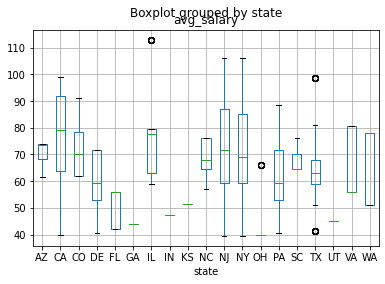

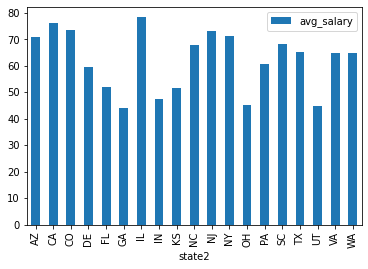

In [23]:
def get_state(s):
    s1 = s
    return s1[len(s1) - 2:]

# print(jobs3['Location'].unique())
jobs3['state'] = jobs3['Location'].apply(get_state)
# print(jobs3['state'].unique())
jobs3.boxplot(column='avg_salary',by='state')
states = jobs3[['state', 'avg_salary', 'Revenue']].groupby(['state']).mean()
states['state2'] = states.index
states.plot('state2', 'avg_salary', kind='bar') 
# print(jobs3.dtypes)

'''
مشاهده می‌کنیم که میانگین و همینزور تنوع حقوق کارها به محل شرکت آن‌ها هم بستگی دارد.
'''